In [2]:
### Importing all the Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt

C:\Users\Aravind KK\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)
Using TensorFlow backend.


# Data Engineering 

We have taken 2 datasets.
Dataset 1 : Season wise statistics for all the Players from year 1950, 
Dataset 2 : Season wise data of all the players who have been selected for All NBA Team from year 1984 to 2017

In [3]:
## Importing Both the Datasets
data= pd.read_csv("All.NBA.1984-2018.csv",header=1) ## All NBA Team selection data
stats= pd.read_csv("Seasons_Stats.csv") ## Season wise stats from 1950

In [4]:
data.head(2)

,Rk,Player,Season,Age,Tm,Lg,WS,G,GS,MP,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
0,1,Michael Jordan,1987-88,24,CHI,NBA,21.2,82,82,3311,...,131,252,270,2868,0.535,0.546,0.132,0.537,0.841,0.603
1,2,Michael Jordan,1995-96,32,CHI,NBA,20.4,82,82,3090,...,42,197,195,2491,0.495,0.506,0.427,0.525,0.834,0.582


In [5]:
stats.head(2)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0


In [6]:
### As we have All NBA Team data only from Year 1985, We filter the data for the year from 1985 to 2018.  
d=stats[(stats.Year >= 1985.0)]
d=d.reset_index()
d.Player = d.Player.apply(lambda x: x.strip('*')) ## Few players name end with '*' in the dataset hence it is removed 

We are creating 2 new columns for All NBA team Selection data. 
Column 1('Selected'): value 1 assigned to all the rows, so that the rows can be identified after merging happens with 
       stats dataset.
    Column 2('Year') : Season column in the dataset is converted to Year, so that it can be merged with the stats dataset 

In [7]:
data["Selected"]= 1
data['Year']=data['Season'].str[:4]
data.Year=data.Year.astype(float)
data.Year=data.Year+1
d2 = data[['Player','Year','Selected','Tm']]

In [8]:
data.Selected.value_counts()

1    475
Name: Selected, dtype: int64

In [9]:
## Required columns from Both the datasets got merged with Year, Player and Team name
## Team name also got used for merging purpose as same player names appear at times in two different teams
final_data=pd.merge(d,d2,how='left',on=['Year','Player','Tm'])

In [10]:
final_data.Selected.value_counts()

1.0    474
Name: Selected, dtype: int64

In [11]:
#### from 475 rows with value '1' froms 'data' dataframe, we got only 474 rows with value '1' in final data
### Below code to find the last missing row with value '1
x=final_data[final_data.Selected==1].Player.unique()
y=d2.Player.unique()
## Assigning x, y  as Lists 
x=x.tolist()
y=y.tolist()
### Finding the last Missing Player
for items in y:
    if (items in x): 
        pass
    else:
        print(items)  

Metta World Peace


Player Metta World Peace's final name 'Peace' was missiing in the All NBA team selection data hence the discrepancy 

In [12]:
data[data.Player=="Metta World Peace"]

,Rk,Player,Season,Age,Tm,Lg,WS,G,GS,MP,...,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%,Selected,Year
421,422,Metta World Peace,2003-04,24,IND,NBA,8.0,73,71,2714,...,194,1333,0.421,0.452,0.31,0.455,0.733,0.511,1,2004.0


In [13]:
final_data[final_data.Player=='Metta World'].head(2)

,index,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Selected
7389,14963,14963,2000.0,Metta World,SF,20.0,CHI,72.0,63.0,2238.0,...,62.0,246.0,308.0,202.0,119.0,39.0,166.0,159.0,866.0,NaN
7926,15501,15501,2001.0,Metta World,SF,21.0,CHI,76.0,74.0,2363.0,...,59.0,235.0,294.0,228.0,152.0,45.0,159.0,254.0,907.0,NaN


In [14]:
## For the Year 2004,Player Metta World's Selection got converted to 1 manually
final_data.ix[9492,'Selected']=1

C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [15]:
### Our Data is perfectly alligned 
final_data.Selected.value_counts()

1.0    475
Name: Selected, dtype: int64

In [16]:
### We will fill the Selected column with value '0' for players who have not been selected to the ALL NBA Team 
final_data['Selected'] = final_data['Selected'].fillna(0)

In [17]:
final_data.Selected.value_counts()        

0.0    16626
1.0      475
Name: Selected, dtype: int64

We have the required data in a single Dataframe. We will remove the unncessary columns and the columns with high amount of correlations. Highly correlated columns will create Collinearity problem hence we will remove them to avoid it.  

In [18]:
final_data.isnull().sum()

index             0
Unnamed: 0        0
Year              0
Player            0
Pos               0
Age               0
Tm                0
G                 0
GS                0
MP                0
PER               5
TS%              75
3PAr             86
FTr              86
ORB%              5
DRB%              5
TRB%              5
AST%              5
STL%              5
BLK%              5
TOV%             60
USG%              5
blanl         17101
OWS               0
DWS               0
WS                0
WS/48             5
blank2        17101
OBPM              0
DBPM              0
BPM               0
VORP              0
FG                0
FGA               0
FG%              86
3P                0
3PA               0
3P%            3096
2P                0
2PA               0
2P%             115
eFG%             86
FT                0
FTA               0
FT%             705
ORB               0
DRB               0
TRB               0
AST               0
STL               0


In [19]:
#### Removing the Blank Columns and unnecessary columns
final_data=final_data.drop(['blank2','blanl','index','Unnamed: 0'],axis=1)

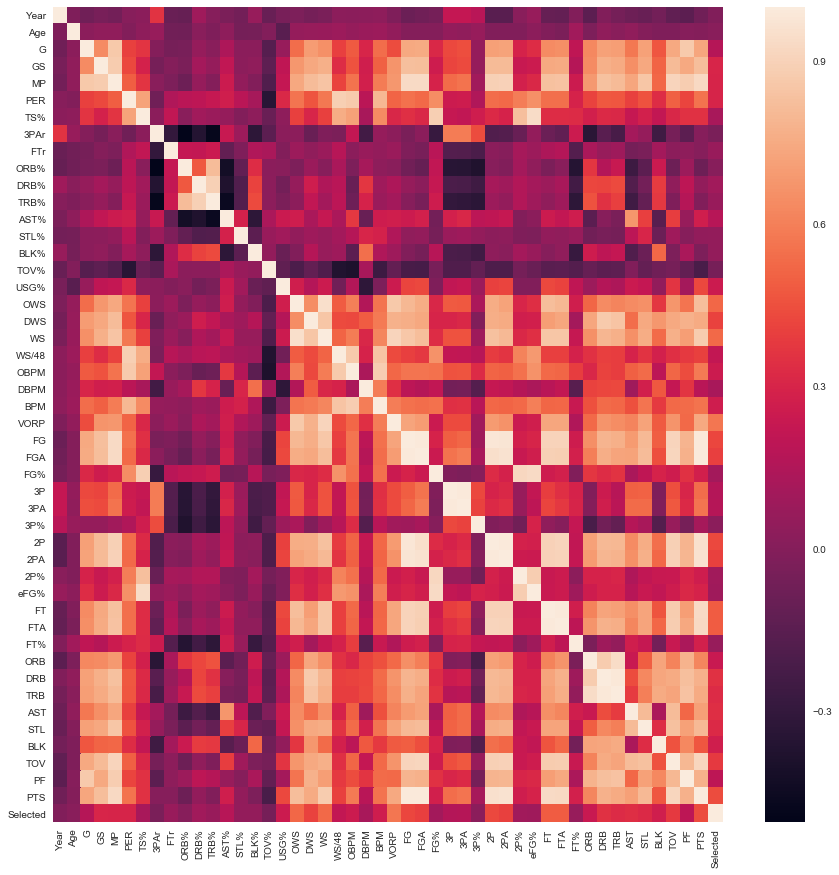

In [20]:
#### Finding Correlation among the variables 
corr=final_data.corr(method='pearson')
# plot the heatmap

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Columns with correlation more than 0.95 is removed

In [21]:
## correlation matrix
corr_matrix = final_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

## Index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

## Dropping the columns with correlation greater than 0.95 
df=final_data.drop(final_data[to_drop], axis=1)

In [22]:
### Stastistics of the Dataset
df.describe()

,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,...,FT,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,Selected
count,17101.000000,17101.000000,17101.000000,17101.000000,17101.000000,17096.000000,17026.000000,17015.000000,17015.000000,17096.000000,...,17101.000000,16396.000000,17101.000000,17101.000000,17101.000000,17101.000000,17101.000000,17101.000000,17101.000000,17101.000000
mean,2002.225659,26.919829,48.949944,23.377288,1144.462546,12.369771,0.503502,0.172665,0.318334,6.093244,...,91.021227,0.721709,57.998012,142.032922,107.456815,37.735922,23.622537,69.641834,104.837904,0.027776
std,9.319357,4.061293,26.614778,28.494257,921.553601,6.304928,0.096096,0.191354,0.233968,5.049557,...,106.135142,0.148591,64.530333,140.769340,136.383563,37.144486,35.830767,64.757108,78.856026,0.164336
min,1985.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1995.000000,24.000000,25.000000,0.000000,299.000000,9.600000,0.472000,0.006000,0.194000,2.400000,...,14.000000,0.658000,11.000000,31.000000,16.000000,8.000000,3.000000,17.000000,33.000000,0.000000
50%,2003.000000,26.000000,53.000000,8.000000,958.000000,12.600000,0.516000,0.092000,0.285000,5.100000,...,53.000000,0.750000,34.000000,103.000000,58.000000,27.000000,11.000000,52.000000,95.000000,0.000000
75%,2010.000000,30.000000,74.000000,45.000000,1863.000000,15.600000,0.552000,0.309000,0.394000,8.900000,...,130.000000,0.815000,84.000000,207.000000,145.000000,56.000000,29.000000,106.000000,164.000000,0.000000
max,2019.000000,44.000000,85.000000,83.000000,3533.000000,129.100000,1.136000,1.000000,6.000000,100.000000,...,833.000000,1.000000,523.000000,1007.000000,1164.000000,301.000000,456.000000,464.000000,371.000000,1.000000


In [23]:
df.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'FG', 'FG%', '3P', '3P%', '2P%', 'eFG%', 'FT', 'FT%', 'ORB', 'DRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'Selected'],
      dtype='object')

We will see a Box Plot which shows the various Statistical Difference between players who have won the awards and players who have not won the awards. 

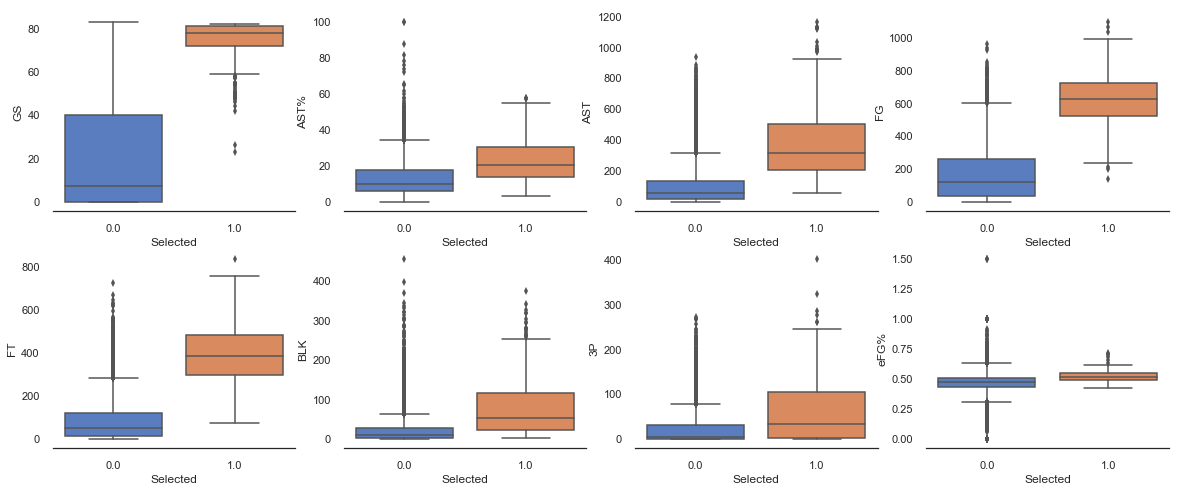

In [24]:
### Visualizing the Important Statistics for a player with Box Plot 
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)
f, axes = plt.subplots(2, 4, figsize=(20, 8))
sns.despine(left=True)
sns.boxplot(data = df, y = 'GS', x = 'Selected',ax=axes[0, 0])
sns.boxplot(data = df, y = 'AST%', x = 'Selected', ax=axes[0, 1])
sns.boxplot(data = df, y = 'AST', x = 'Selected', ax=axes[0, 2])
sns.boxplot(data = df, y = 'FG', x = 'Selected', ax=axes[0, 3])
sns.boxplot(data = df, y = 'FT', x = 'Selected', ax=axes[1, 0])
sns.boxplot(data = df, y = 'BLK', x = 'Selected', ax=axes[1, 1])
sns.boxplot(data = df, y = '3P', x = 'Selected', ax=axes[1, 2])
sns.boxplot(data = df, y = 'eFG%', x = 'Selected', ax=axes[1, 3])

We can see the clear distinction between the players who have not won the award and player who have won the award
in most of the statistics

Exceptional Players tend to be the outliers from a normal group. Hence we kept the outliers for the current analysis 
as we are trying to predict the awards for the Exceptional Players.

In [25]:
#### Function to remove the Outliers
def removing_outliers(data):
    columns = data.columns
    for i in columns:
        q1 = numeric_stats.loc['25%'][i]
        q3 = numeric_stats.loc['75%'][i]
        IQR = q3-q1
        LL = q1-(1.5*IQR)
        UL = q3+(1.5*IQR)
        data.drop(data.loc[(data[i]<=LL)|(data[i]>=UL),[i]].index, inplace=True)
        return(data)
    
### The Players who receive the awards will perform exceptionally and their stats will be well above the ordinary players 
### For further analysis we will keep the outliers in the dataset and will verify the accuracies of our model. 

Imputing the Null Values of all the columns in the dataset with the Mean

In [26]:
null_columns = df.columns[df.isnull().any()]
for k in null_columns:
        df[k].fillna(round(df[k].mean(),2), inplace = True)

In [27]:
df.isnull().sum()

Year        0
Player      0
Pos         0
Age         0
Tm          0
G           0
GS          0
MP          0
PER         0
TS%         0
3PAr        0
FTr         0
ORB%        0
DRB%        0
TRB%        0
AST%        0
STL%        0
BLK%        0
TOV%        0
USG%        0
OWS         0
DWS         0
WS          0
WS/48       0
OBPM        0
DBPM        0
BPM         0
VORP        0
FG          0
FG%         0
3P          0
3P%         0
2P%         0
eFG%        0
FT          0
FT%         0
ORB         0
DRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
Selected    0
dtype: int64

## We will remove the players statitics in seasons where they have played very less amount of time.
#As there statistics will vary from other players who have played the season on normal conditions. 
#Example: Players who are injured mid season, Players who are kept as substitute for most of the season. 
#These data will bias the model 

In [28]:
df= df[(df.MP >= (data['MP'].min()*0.7))]
## we have taken lowest time taken by a player to win the award and reduced the time by 30% more and kept that as the cut 
## off time for players entering the model for analysis

In [29]:
df.Selected.value_counts()

0.0    7911
1.0     475
Name: Selected, dtype: int64

# We are creating 3 new columns 
## Column 1: Total Number of Years Played till Date ("TYT") (This column will help us to reduce the dependency on the Year Column)
## Column 2: Total Number of Awards won till Data("TAT") ( As the year progresses, the number of awards won will increase)
## Column 3: Total Number of Awards won at the End of Carrer ("TAW") (Our Dependent Variable  "Y" that we are gonna predict)

In [30]:
#### Creating the required columns 
Players= df.Player.unique()
x_df = pd.DataFrame()
for players in Players:
    x=df[df['Player']==players]
    x['TAW']=x.Selected.sum()
    x['TYP']=0
    x['TAT']=0
    j=1
    k=1
    m=0
    for i in x.index:
        x['TYP'][i]=j
        j=j+1
        if x['Selected'][i]==1:
            x['TAT'][i]=k
            k=k+1
            m=m+1
        else :
            x['TAT'][i]=m
    x_df=x_df.append(x)
    

C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [31]:
x_df.head(3)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,DRB,AST,STL,BLK,TOV,PF,Selected,TAW,TYP,TAT
0,1985.0,Kareem Abdul-Jabbar,C,37.0,LAL,79.0,79.0,2630.0,22.9,0.628,...,460.0,249.0,63.0,162.0,197.0,238.0,1.0,2.0,1,1
362,1986.0,Kareem Abdul-Jabbar,C,38.0,LAL,79.0,79.0,2629.0,22.7,0.603,...,345.0,280.0,67.0,130.0,203.0,248.0,1.0,2.0,2,2
741,1987.0,Kareem Abdul-Jabbar,C,39.0,LAL,78.0,78.0,2441.0,17.9,0.597,...,371.0,203.0,49.0,97.0,186.0,245.0,0.0,2.0,3,2


### Before we normalize and train the data, We will remove the Players whose data we are gonna predict at the end. Having their data at the time of training the algorithm will bias the end predictions strongly.

In [32]:
Players_Removed = ['Luka Doncic', 'Karl-Anthony Towns','Kyrie Irving','Stephen Curry']
Players_Analysis = x_df[x_df.Player.isin(Players_Removed)].copy()

In [33]:
xdf = x_df[~x_df.Player.isin(Players_Removed)].copy()

In [34]:
xdf.shape

(8370, 47)

### As the basket Ball game rules have changed over the course of years, We will normalize the data by taking 
### means for each year seperately and normalize the data accordingly. In this way, the normalization will account 
### for the various rule changes happened over the course of years. 

In [35]:
#### Standardising the numeric data 
stand_data=xdf.groupby('Year').transform(lambda x: (x - x.mean()) / x.std())
stand_data=stand_data.drop(['Selected','TAW'],axis=1)
merge_data = xdf[['Year','Player','Pos','TAW']]

In [36]:
result = pd.concat([merge_data, stand_data],axis=1)

In [37]:
result.head(3)

,Year,Player,Pos,TAW,Age,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,TYP,TAT
0,1985.0,Kareem Abdul-Jabbar,C,2.0,3.334472,0.461148,1.194113,0.996990,2.162057,2.102922,...,-0.417520,0.584619,1.453182,0.129866,-0.206008,2.228828,0.806177,0.658432,-0.100001,4.359470
362,1986.0,Kareem Abdul-Jabbar,C,2.0,3.461722,0.456418,1.204711,1.129897,2.275894,1.403943,...,0.136353,0.242307,0.704877,0.389995,-0.097412,1.567434,0.998581,0.887581,0.415619,5.419993
741,1987.0,Kareem Abdul-Jabbar,C,2.0,3.673769,0.396951,1.051089,0.627819,0.836254,1.332168,...,-0.576968,0.356739,0.780224,-0.134363,-0.562862,0.967207,0.718616,0.794971,0.609002,3.453356


In [38]:
### Resetting the Index for Analysis purposes
result=result.reset_index()

In [39]:
result.head(3)

,index,Year,Player,Pos,TAW,Age,G,GS,MP,PER,...,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,TYP,TAT
0,0,1985.0,Kareem Abdul-Jabbar,C,2.0,3.334472,0.461148,1.194113,0.996990,2.162057,...,-0.417520,0.584619,1.453182,0.129866,-0.206008,2.228828,0.806177,0.658432,-0.100001,4.359470
1,362,1986.0,Kareem Abdul-Jabbar,C,2.0,3.461722,0.456418,1.204711,1.129897,2.275894,...,0.136353,0.242307,0.704877,0.389995,-0.097412,1.567434,0.998581,0.887581,0.415619,5.419993
2,741,1987.0,Kareem Abdul-Jabbar,C,2.0,3.673769,0.396951,1.051089,0.627819,0.836254,...,-0.576968,0.356739,0.780224,-0.134363,-0.562862,0.967207,0.718616,0.794971,0.609002,3.453356


### Categorical Variable
Position is our categorical variable. We will convert it 5 boolean variables for each position. Few players
occupy dual positions in the team. This is accomodated by assigning value '1' to both position variables in same row.
Hence we will create the dummy variables manually to accodomate all the possible combinations players take in the field. 

In [40]:
result.Pos.unique()

array(['C', 'PF', 'SF', 'SG', 'PG', 'SF-SG', 'C-PF', 'SF-PF', 'PF-SF',
       'SG-SF', 'PG-SG', 'PG-SF', 'PF-C', 'SG-PG', 'SG-PF'], dtype=object)

In [41]:
#### Manually doing one hot Encoding 
result['C'] = 0 
result['PF']= 0
result['SF']= 0
result['SG']= 0
result['PG']= 0
for i in range( len(result) ):
    a = result['Pos'][i].split('-')
    for j in a:
        if j == 'C':
            result['C'][i] = 1 
        if j == 'PF':
            result['PF'][i] = 1
        if j ==  'SF':
            result['SF'][i]= 1
        if j == 'SG':
            result['SG'][i]= 1
        if j == 'PG':
            result['PG'][i]=  1

C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipyke

In [42]:
result.head(10)

,index,Year,Player,Pos,TAW,Age,G,GS,MP,PER,...,STL,BLK,TOV,PF,TYP,TAT,C,SF,SG,PG
0,0,1985.0,Kareem Abdul-Jabbar,C,2.0,3.334472,0.461148,1.194113,0.996990,2.162057,...,-0.206008,2.228828,0.806177,0,-0.100001,4.359470,1,0,0,0
1,362,1986.0,Kareem Abdul-Jabbar,C,2.0,3.461722,0.456418,1.204711,1.129897,2.275894,...,-0.097412,1.567434,0.998581,0,0.415619,5.419993,1,0,0,0
2,741,1987.0,Kareem Abdul-Jabbar,C,2.0,3.673769,0.396951,1.051089,0.627819,0.836254,...,-0.562862,0.967207,0.718616,0,0.609002,3.453356,1,0,0,0
3,1119,1988.0,Kareem Abdul-Jabbar,C,2.0,3.950887,0.684521,1.269172,0.560624,0.276444,...,-0.506775,1.021302,0.454153,0,0.715513,2.787027,1,0,0,0
4,1545,1989.0,Kareem Abdul-Jabbar,C,2.0,4.090778,0.078989,0.953745,-0.529395,-0.543087,...,-0.830358,0.752276,-0.733651,0,0.766740,2.344931,1,0,0,0
5,1,1985.0,Alvan Adams,PF,0.0,1.099311,0.814031,0.842182,0.190230,1.334705,...,1.023689,0.071551,0.806177,1,-0.100001,-0.228244,0,0,0,0
6,363,1986.0,Alvan Adams,C,0.0,1.286658,0.346940,0.048993,0.066043,0.132836,...,0.795006,0.035281,1.047605,0,0.415619,-0.239117,1,0,0,0
7,742,1987.0,Alvan Adams,C,0.0,1.572306,-0.638574,-0.212435,-0.562924,-0.074882,...,-0.254014,-0.198978,-0.033796,0,0.609002,-0.272881,1,0,0,0
8,1121,1988.0,Alvan Adams,C,0.0,1.835376,0.867450,-0.628206,-0.486101,-0.443016,...,0.288640,-0.068288,0.122621,0,0.715513,-0.280103,1,0,0,0
9,2,1985.0,Mark Aguirre,SF,0.0,-0.497232,0.578776,1.194113,1.109675,1.735037,...,-0.276952,-0.382612,1.711979,0,-0.100001,-0.228244,0,1,0,0


# Regression Analysis

Our objective is to predict the Total Awards That will be won by the player given any seasons statistics. 
Our Target Variable is "TAW"( Total Awards Won at the end of their career). We will perform various regression 
analysis on the dataset. We will choose the best model based on the Mean Squared value, Mean Absolute Error 
and residual pltos. The final best model will be used to do predictions on the given players. 

In [44]:
model_data=result.drop(['index', 'Year','Player','Pos','TAW'], axis=1)
y = result['TAW']

We will split the data into train and test set for evaluation purposes

In [45]:
X_train, X_test, y_train, y_test = train_test_split(model_data, y, test_size=0.3)

#### Multi Linear Regression 

In [62]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

0.8058144152673319
[-2.84477900e-01  2.77331389e-02 -1.93460279e-02 -7.29985445e-01
  4.18082776e-01 -6.92717485e-01  2.56630046e-01  1.50787105e-01
  1.10671476e+00  1.11024759e+00 -2.16533284e+00 -3.80337156e-02
 -1.39695935e-01 -3.67930132e-01  7.62710733e-02 -3.69349033e-01
 -4.86015140e-01 -2.98352164e-01  9.63566024e-01 -2.56114354e-02
 -3.09191551e-01 -1.58404526e-01 -2.19722336e-02  5.64986717e-01
  5.00001833e-01  3.74210397e-02 -2.94459769e-01 -1.74306399e-04
 -9.24215729e-02  4.91299008e-01  1.26095529e-01  2.31620898e-02
 -5.73130413e-01  3.60449940e-01 -8.83319751e-02  1.07727766e-01
  3.74093273e-01  2.28214555e-01 -1.14207008e-02  1.07505553e-01
  1.64785317e+00  3.04115567e-02 -5.97413514e-02  3.10081574e-02
 -1.41553922e-01]


In [48]:
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Square:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.566222447546835
Mean Squared Error: 1.4764913798901649
Root Mean Squared Error: 1.2151096164092212
R Square: 0.7225236711948977


In [51]:
coeff_df = pd.DataFrame(regressor.coef_, X_train.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Age,-0.284478
G,0.027733
GS,-0.019346
MP,-0.729985
PER,0.418083
TS%,-0.692717
3PAr,0.256630
FTr,0.150787
ORB%,1.106715
DRB%,1.110248


We will do Multi Linear Regression again by Selective Sampling 

We will keep 60 % percent of the Data with players who have got selections and 40 % of the data with players
who did not have any selection. We try this method to check if bias is induced due to high ratio of non selected players 
in the dataset

In [52]:
model_data1=result.drop(['index', 'Year','Player','Pos'], axis=1).copy()
### Creating two datasets 
data1  = model_data1[model_data1['TAW'] == 0]
data2 = model_data1[model_data1['TAW']> 0]
data3 = data1.sample(n=1000, random_state=1)

In [53]:
model_data2 = pd.concat([data2,data3])
y1=model_data2['TAW']
model_data3 =  model_data2.drop(['TAW'],axis=1).copy()

In [54]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(model_data3, y1, test_size=0.3)

In [56]:
regressor.fit(X_train1, y_train1)
y_pred1 = regressor.predict(X_test1)
y_pred_train1 = regressor.predict(X_train1)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

Mean Absolute Error: 1.2926917456553422
Mean Squared Error: 4.108271264971306
Root Mean Squared Error: 2.026887087375936


Performing selective sampling increases the Mean Squared Error and Mean Absolute Error. Hence we will maintain with our
original dataset

We will perform Cross-Validation to check if there is any increase in the Model Performance 

In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, model_data, y, cv=10, scoring='neg_mean_squared_error')

In [58]:
scores

array([-2.59455399, -2.13442133, -0.88118567, -1.36896452, -2.36631862,
       -2.29542551, -0.60633831, -1.23006484, -0.5705103 , -0.38717166])

In [59]:
scores.mean()

-1.4434954749480216

Even after performing cross validation, we can not able to see any significant increase in the model performance. 
Mean Squared Error still remained the same. 

#### Residual Plot for Multi Linear Regression Model

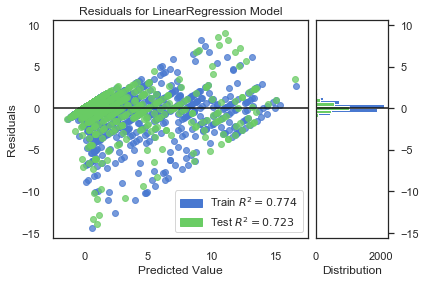

In [65]:
visualizer = ResidualsPlot(regressor) ## Regressor from Multi Linear regression performed 1st
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

From the residual plot, we can not able to see any particular upward or downward trend. This shows that model
has taken as much information as possible from the dataset. The R square of the model is 0.75 in average. 
The residuals also follow normal distribution which shows that they are a random set. 

#### Random Forest Regressor 

In [66]:
random_regressor = RandomForestRegressor(n_estimators = 30, random_state = 20) 

In [67]:
random_regressor.fit(X_train, y_train) #training the algorithm
y_pred_rand= random_regressor.predict(X_test)
y_pred_train_rand = random_regressor.predict(X_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rand))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rand))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rand)))

Mean Absolute Error: 0.35398911456259124
Mean Squared Error: 1.1588857914066992
Root Mean Squared Error: 1.07651557880353


The Random forest regressor model has performed better than the Multi Linear Regression model. The Mean Squared Error 
got reduced to 1.15 from 1.44 and Mean Absolute Error got reduced to 0.35 from 0.56

Performing Grid Search to check if the Model performance increases

In [68]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [5,10],
    'n_estimators': [30, 50, 70]
}

In [70]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = random_regressor, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [71]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   15.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=20, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100], 'max_features': [5, 10], 'n_estimators': [30, 50, 70]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [72]:
y_pred_gs= grid_search.predict(X_test)
y_pred_train_gs = grid_search.predict(X_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gs))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gs))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gs)))

Mean Absolute Error: 0.3976332707515503
Mean Squared Error: 1.1700350295434783
Root Mean Squared Error: 1.0816815749302002


After taking the best hyper parameters through grid search, Random Forest Regressor model performance has not increased.
Mean Squared Error and Mean Absolute Error are in same range.

#### Residual Plot for Random Forest Regressor 

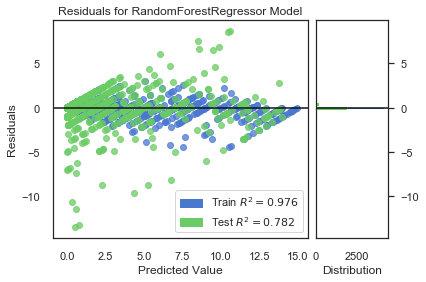

In [74]:
visualizer = ResidualsPlot(random_regressor) 
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

We see that R square value has significantly increased from Multi Linear Regression model. The plot looks more
random than the Multi Linear regression plot. 

#### Support Vector Machine Model 

we will use various kernel to predict our target variable. 

In [75]:
#### Radial Basis Function Kernel
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
#### Linear Kernel
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
#### Polynomial Kernel
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=2, epsilon=.1,
               coef0=1)

Radial Basis Function Kernel

In [77]:
svr_rbf.fit(X_train, y_train) #training the algorithm
y_pred_rbf= svr_rbf.predict(X_test)
y_pred_train_rbf = svr_rbf.predict(X_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rbf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rbf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rbf)))

Mean Absolute Error: 0.6069035053413802
Mean Squared Error: 1.6403557405999603
Root Mean Squared Error: 1.2807637333247535


We can see that Mean Squared Error has increased more than for Multi Linear Regressor model. 

Linear Kernel 

In [78]:
svr_lin.fit(X_train, y_train) #training the algorithm
y_pred_lin= svr_lin.predict(X_test)
y_pred_train_lin = svr_lin.predict(X_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lin))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lin))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin)))

Mean Absolute Error: 0.3715933037817732
Mean Squared Error: 1.655406972308376
Root Mean Squared Error: 1.2866261975835778


Polynomial Kernel

In [79]:
svr_poly.fit(X_train, y_train) #training the algorithm
y_pred_poly= svr_poly.predict(X_test)
y_pred_train_poly = svr_poly.predict(X_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_poly))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_poly))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))

Mean Absolute Error: 0.3580497124795454
Mean Squared Error: 1.2100515895979773
Root Mean Squared Error: 1.100023449567316


Polynomial kernel performed better than the Linear Kernel. But the errors are still higher than the Random Forest Regressor 

### Neural Networks

We will implement Neural Networks using Keras Library. The network with have 5 layers with number of neurons getting halved 
as we go through each layer. The last layer will have one neuron. 

In [81]:
### Converting all the Data to arrays for feeding the data into the Neural Network. 
xtrain=X_train.values
ytrain=y_train.values
xtest = X_test.values
ytest = y_test.values

In [144]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(45, kernel_initializer='uniform', activation='sigmoid'))
    model.add(Dense(22,  kernel_initializer='uniform', activation='sigmoid'))
    model.add(Dense(10,  kernel_initializer='uniform', activation='sigmoid'))
    model.add(Dense(5,  kernel_initializer='uniform', activation='sigmoid'))
    model.add(Dense(1, kernel_initializer='uniform'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [145]:
nn = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

In [147]:
nn.fit(xtrain, ytrain) #training the algorithm
y_pred_nn= nn.predict(xtest)
y_pred_train_nn = nn.predict(xtrain)
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred_nn))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred_nn))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred_nn)))

Mean Absolute Error: 0.33777317998182343
Mean Squared Error: 0.942503162111346
Root Mean Squared Error: 0.9708260205162128


Neural Network performs the best on the dataset. Both the Mean Squared Error and Mean Absolute Error is lowest 
for the Neural Network model. 

## Hence We will use Neural Network model for further predictions

In [85]:
y_pred_nn

array([ 0.10297996, -0.00266176, -0.04430187, ..., -0.06257948,
       -0.0598743 , -0.05333555], dtype=float32)

In [87]:
comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_nn})
#comp[comp['Actual']>0]

In [88]:
comp

,Actual,Predicted
8098,0.0,0.102980
3485,0.0,-0.002662
1279,0.0,-0.044302
6041,0.0,-0.041668
7673,0.0,-0.027495
...,...,...
3374,0.0,-0.035201
4728,0.0,-0.048267
206,0.0,-0.062579
4601,0.0,-0.059874


In [89]:
### Round function to convert the prediction to Integers
def rounding_function(x):
    y=x.copy()
    for i in range(len(y)):
        y[i]=round(y[i])
        if y[i]<0:
            y[i]=0
    return y

In [90]:
y_pred_final= rounding_function(y_pred_nn)

In [91]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_final})
comparison[comparison['Actual']>0] ### Only for the records with Selections

,Actual,Predicted
4682,1.0,3.0
6047,8.0,0.0
6907,7.0,5.0
3760,9.0,10.0
3800,1.0,0.0
...,...,...
5405,1.0,0.0
314,1.0,1.0
2346,3.0,2.0
5489,4.0,2.0


# Predictions for the Players

In [95]:
### Except Luka Doncic, for other players we have data till 2017. Luka Doncic's data is manually addded to the dataset
Players_Analysis

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,DRB,AST,STL,BLK,TOV,PF,Selected,TAW,TYP,TAT
12458,2010.0,Stephen Curry,PG,21.0,GSW,80.0,77.0,2896.0,16.3,0.568,...,308.0,472.0,152.0,19.0,243.0,252.0,0.0,4.0,1,0
13069,2011.0,Stephen Curry,PG,22.0,GSW,74.0,74.0,2489.0,19.4,0.595,...,234.0,432.0,109.0,20.0,226.0,233.0,0.0,4.0,2,0
14211,2013.0,Stephen Curry,PG,24.0,GSW,78.0,78.0,2983.0,21.3,0.589,...,255.0,539.0,126.0,12.0,240.0,198.0,0.0,4.0,3,0
14814,2014.0,Stephen Curry,PG,25.0,GSW,78.0,78.0,2846.0,24.1,0.610,...,288.0,666.0,128.0,14.0,294.0,194.0,1.0,4.0,4,1
15411,2015.0,Stephen Curry,PG,26.0,GSW,80.0,80.0,2613.0,28.0,0.638,...,285.0,619.0,163.0,16.0,249.0,158.0,1.0,4.0,5,2
16043,2016.0,Stephen Curry,PG,27.0,GSW,79.0,79.0,2700.0,31.5,0.669,...,362.0,527.0,169.0,15.0,262.0,161.0,1.0,4.0,6,3
16625,2017.0,Stephen Curry,PG,28.0,GSW,79.0,79.0,2638.0,24.6,0.624,...,292.0,523.0,143.0,17.0,239.0,183.0,1.0,4.0,7,4
13801,2012.0,Kyrie Irving,PG,19.0,CLE,51.0,51.0,1558.0,21.4,0.566,...,147.0,275.0,54.0,20.0,160.0,110.0,0.0,1.0,1,0
14339,2013.0,Kyrie Irving,PG,20.0,CLE,59.0,59.0,2048.0,21.4,0.553,...,182.0,350.0,89.0,21.0,191.0,146.0,0.0,1.0,2,0
14953,2014.0,Kyrie Irving,PG,21.0,CLE,71.0,71.0,2496.0,20.1,0.533,...,207.0,433.0,108.0,23.0,190.0,163.0,0.0,1.0,3,0


In [98]:
### Standardizing the Players data and preparing the data for Analysis
s_data = Players_Analysis._get_numeric_data().transform(lambda x: (x - x.mean()) / x.std()).copy()
s_data= s_data.drop(['Selected','TAW','Year'],axis=1)
m_data = Players_Analysis[['Year','Player','Pos','TAW']]

In [99]:
r = pd.concat([m_data, s_data],axis=1)

In [100]:
r.Pos.unique()

array(['PG', 'C', 'SG'], dtype=object)

In [103]:
r['PG'] = np.where(r['Pos']=='PG', '1', '0')
r['C'] = np.where(r['Pos']=='C', '1', '0')
r['SG'] = np.where(r['Pos']=='SG', '1', '0')
r['PF']=0
r['SF']=0

In [106]:
r.head(2)

,Year,Player,Pos,TAW,Age,G,GS,MP,PER,TS%,...,STL,BLK,TOV,PF,TYP,TAT,PG,C,SG,SF
12458,2010.0,Stephen Curry,PG,4.0,-0.579987,0.725446,0.446871,0.901028,-1.689156,-0.520752,...,1.184894,-0.355992,0.664425,0,-1.142643,-0.664327,1,0,0,0
13069,2011.0,Stephen Curry,PG,4.0,-0.223072,0.119856,0.140445,-0.049635,-0.849656,0.197985,...,0.092123,-0.327794,0.273249,0,-0.648527,-0.664327,1,0,0,0


# Luka Doncic

Prediction using Neural Networks

In [110]:
luka = r[r['Player']=='Luka Doncic']

In [111]:
luka

,Year,Player,Pos,TAW,Age,G,GS,MP,PER,TS%,...,STL,BLK,TOV,PF,TYP,TAT,PG,C,SG,SF
17100,2019.0,Luka Doncic,SG,0.0,-1.293818,-0.082007,-0.063839,-0.449054,-0.795494,-1.133009,...,-0.721102,-0.186808,0.756467,0,-1.142643,-0.664327,0,0,1,0


In [132]:
luka_test = luka.drop(['Year','Player','Pos','TAW'], axis=1)

In [148]:
luka_predict = nn.predict(luka_test)

In [149]:
luka_predict

array(0.61564267, dtype=float32)

# Karl-Anthony Towns

In [116]:
karl = r[r['Player']=='Karl-Anthony Towns']

In [117]:
karl

,Year,Player,Pos,TAW,Age,G,GS,MP,PER,TS%,...,STL,BLK,TOV,PF,TYP,TAT,PG,C,SG,SF
16450,2016.0,Karl-Anthony Towns,C,0.0,-0.936903,0.927309,0.95758,0.272703,-0.010155,0.064886,...,-1.203954,2.999495,-0.716199,0,-1.142643,-0.664327,0,1,0,0
17034,2017.0,Karl-Anthony Towns,C,0.0,-0.579987,0.927309,0.95758,1.214023,0.937668,0.810243,...,-1.229368,2.012587,-0.048897,0,-0.648527,-0.664327,0,1,0,0


In [122]:
### We will use the 2017 stats for the prediction
karl_test = karl.iloc[[1]].drop(['Year','Player','Pos','TAW'], axis=1)

In [150]:
karl_predict = nn.predict(karl_test)

In [151]:
karl_predict

array(0.17276272, dtype=float32)

# Kyrie Irving

In [126]:
kyrie = r[r['Player']=='Kyrie Irving']

In [127]:
kyrie

,Year,Player,Pos,TAW,Age,G,GS,MP,PER,TS%,...,STL,BLK,TOV,PF,TYP,TAT,PG,C,SG,SF
13801,2012.0,Kyrie Irving,PG,1.0,-1.293818,-2.201571,-2.208819,-2.224250,-0.308042,-0.573992,...,-1.305607,-0.327794,-1.245438,0,-1.142643,-0.664327,1,0,0,0
14339,2013.0,Kyrie Irving,PG,1.0,-0.936903,-1.394118,-1.391683,-1.079716,-0.308042,-0.920050,...,-0.416142,-0.299597,-0.532116,0,-0.648527,-0.664327,1,0,0,0
14953,2014.0,Kyrie Irving,PG,1.0,-0.579987,-0.182939,-0.165981,-0.033285,-0.660091,-1.452448,...,0.066710,-0.243202,-0.555126,0,-0.154411,-0.664327,1,0,0,0
15559,2015.0,Kyrie Irving,PG,1.0,-0.223072,0.220788,0.242587,0.513288,-0.280962,-0.121453,...,0.219190,-0.327794,-0.647168,0,0.339705,0.153306,1,0,0,0
16188,2016.0,Kyrie Irving,PG,1.0,0.133843,-1.999707,-2.004535,-1.969649,-0.714252,-1.266109,...,-1.254781,-0.384189,-2.073813,0,0.833821,0.153306,1,0,0,0
16769,2017.0,Kyrie Irving,PG,1.0,0.490759,-0.082007,-0.063839,0.034453,0.125248,-0.201313,...,-0.568622,-0.186808,-0.785230,0,1.327937,0.153306,1,0,0,0


In [135]:
### We will use the 2017 stats for the prediction
kyrie_test = kyrie.iloc[[5]].drop(['Year','Player','Pos','TAW'], axis=1)

In [152]:
kyrie_predict = nn.predict(kyrie_test)

In [153]:
kyrie_predict

array(0.18732545, dtype=float32)

# Stephen Curry

In [138]:
stephen = r[r['Player']=='Stephen Curry']

In [139]:
stephen

,Year,Player,Pos,TAW,Age,G,GS,MP,PER,TS%,...,STL,BLK,TOV,PF,TYP,TAT,PG,C,SG,SF
12458,2010.0,Stephen Curry,PG,4.0,-0.579987,0.725446,0.446871,0.901028,-1.689156,-0.520752,...,1.184894,-0.355992,0.664425,0,-1.142643,-0.664327,1,0,0,0
13069,2011.0,Stephen Curry,PG,4.0,-0.223072,0.119856,0.140445,-0.049635,-0.849656,0.197985,...,0.092123,-0.327794,0.273249,0,-0.648527,-0.664327,1,0,0,0
14211,2013.0,Stephen Curry,PG,4.0,0.490759,0.523583,0.549013,1.104242,-0.335123,0.038266,...,0.524149,-0.553373,0.595394,0,-0.154411,-0.664327,1,0,0,0
14814,2014.0,Stephen Curry,PG,4.0,0.847674,0.523583,0.549013,0.784239,0.423135,0.597284,...,0.574976,-0.496979,1.837956,0,0.339705,0.153306,1,0,0,0
15411,2015.0,Stephen Curry,PG,4.0,1.204589,0.725446,0.753297,0.240002,1.479281,1.342641,...,1.464440,-0.440584,0.802488,0,0.833821,0.970939,1,0,0,0
16043,2016.0,Stephen Curry,PG,4.0,1.561504,0.624514,0.651155,0.443215,2.427104,2.167858,...,1.616920,-0.468781,1.101623,0,1.327937,1.788572,1,0,0,0
16625,2017.0,Stephen Curry,PG,4.0,1.918420,0.624514,0.651155,0.298396,0.558539,0.969962,...,0.956175,-0.412387,0.572384,0,1.822053,2.606205,1,0,0,0


In [140]:
### We will use the 2017 stats for the prediction
stephen_test = stephen.iloc[[6]].drop(['Year','Player','Pos','TAW'], axis=1)

In [154]:
stephen_predict = nn.predict(stephen_test)

In [155]:
stephen_predict

array(3.6749446, dtype=float32)